In [103]:
import numpy as np
#import scipy 
import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn

In [104]:
list_germanium= np.loadtxt("germanium1.txt")
list_silicon= np.loadtxt("silicon1.txt")


Text(0.5, 1.0, 'Diode')

<Figure size 640x480 with 0 Axes>

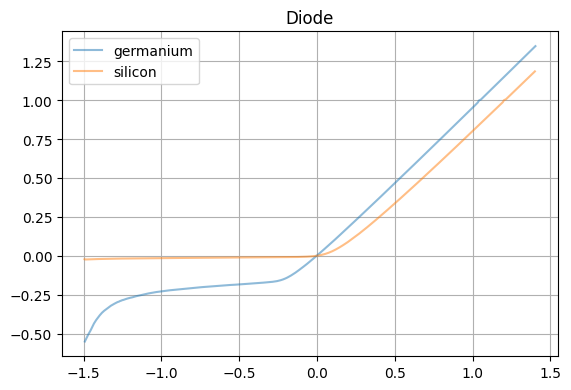

In [105]:
#seaborn.set(style='ticks')

plt.figure()
fig, ax = plt.subplots()

ax.plot(list_germanium[:,0],list_germanium[:,1],label="germanium",alpha=.5)
ax.plot(list_silicon[:,0],list_silicon[:,1],label="silicon",alpha=.5)

ax.set_aspect('equal')

ax.grid(True, which='both')
#seaborn.despine(ax=ax, offset=0) # the important part here

plt.legend()
plt.title("Diode")

#plt.savefig('diode.png')

In [106]:
def setROIarray(list, left, right):
    flagL=flagR=False
    for i in range(len(list)):
        if list[i][0] >= left and flagL==False:
            left_ind = i-1
            flagL = True
        if list[i][0] >= right and flagR==False:
            right_ind = i-1
            flagR=True
    ROI = list[left_ind:right_ind]
    return ROI

def slopeinROI(ROI_array):
    slope = np.array([float(ROI_array[0][0]), 0])
    for i in range(1, len(ROI_array)-1):
        dx = ROI_array[i][0] - ROI_array[i-1][0]
        dy = ROI_array[i][1] - ROI_array[i-1][1]
        temp = np.array([float(ROI_array[i][0]), dy/dx])
        #print(temp)
        slope = np.vstack([slope, temp])
    return slope

def slopeinbounds(array, left, right):
    ROI_array=setROIarray(array, left, right)
    slope = np.array([float(ROI_array[0][0]), 0])
    for i in range(1, len(ROI_array)-1):
        dx = ROI_array[i][0] - ROI_array[i-1][0]
        dy = ROI_array[i][1] - ROI_array[i-1][1]
        temp = np.array([float(ROI_array[i][0]), dy/dx])
        #print(temp)
        slope = np.vstack([slope, temp])
    return slope

#Region of interest
leftBound = -0.5
rightBound = 0.5
ROI_germanium = setROIarray(list_germanium, leftBound, rightBound)
ROI_silicon = setROIarray(list_silicon, leftBound, rightBound)

Text(0.5, 1.0, 'Diode')

<Figure size 640x480 with 0 Axes>

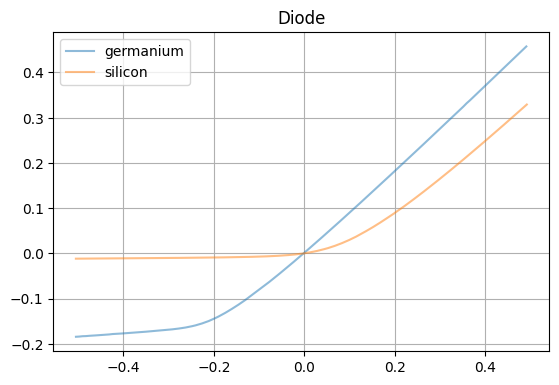

In [107]:
#seaborn.set(style='ticks')

plt.figure()
fig, ax = plt.subplots()

ax.plot(ROI_germanium[:,0],ROI_germanium[:,1],label="germanium",alpha=.5)
ax.plot(ROI_silicon[:,0],ROI_silicon[:,1],label="silicon",alpha=.5)

ax.set_aspect('equal')

ax.grid(True, which='both')
#seaborn.despine(ax=ax, offset=0) # the important part here

plt.legend()
plt.title("Diode")

<Figure size 640x480 with 0 Axes>

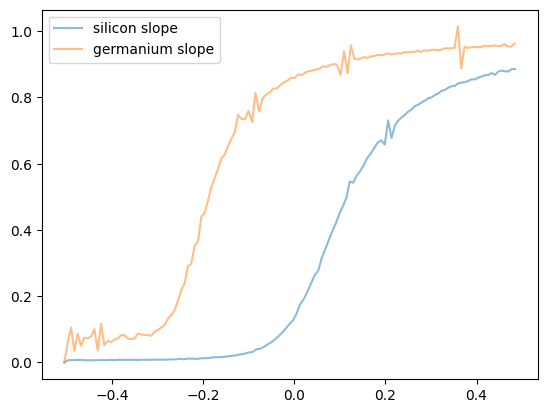

In [108]:
slopeSi = slopeinROI(ROI_silicon)
slopeGe = slopeinROI(ROI_germanium)

slope2Si = slopeinbounds(list_silicon, leftBound, rightBound)

plt.figure()
fig, ax = plt.subplots()
ax.plot(slope2Si[:,0], slope2Si[:,1],label="silicon slope",alpha=.5)
ax.plot(slopeGe[:,0],slopeGe[:,1], label="germanium slope", alpha=.5)
plt.legend()